In [60]:
import cv2
import skvideo.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [61]:
species_list = ['species_fourspot',
 'species_grey sole',
 'species_other',
 'species_plaice',
 'species_summer',
 'species_windowpane',
 'species_winter']

In [105]:
def process_row(row,frame,class_name, display=False, bounding_pad=5):
    x1, x2, y1, y2 = map(int, row[['x1', 'x2', 'y1', 'y2']].as_matrix())
    
    image = frame
    if x1 > x2:
        box_x1 = x2 - bounding_pad
        box_x2 = x1 + bounding_pad
        if y1 > y2:
            box_y1 = y2 - bounding_pad
            box_y2 = y1 + bounding_pad
            corner="top_left"
            point_a = (bounding_pad, bounding_pad)
            point_b = (box_x2 -box_x1 - bounding_pad, box_y2-box_y1 - bounding_pad)
        else:
            box_y1 = y2 + bounding_pad
            box_y2 = y1 - bounding_pad
            corner="botton_left"
            point_a = (bounding_pad, box_y2-box_y1 - bounding_pad)
            point_b = (box_x2 -box_x1 - bounding_pad, bounding_pad)
    else:
        box_x1 = x1 - bounding_pad
        box_x2 = x2 + bounding_pad
        if y1 > y2:
            box_y1 = y1 + bounding_pad
            box_y2 = y2 - bounding_pad
            corner="bottom_right"
            point_a = (box_x2 -box_x1 - bounding_pad, box_y2-box_y1 - bounding_pad)
            point_b = (bounding_pad, bounding_pad)
        else:
            box_y1 = y1 - bounding_pad
            box_y2 = y2 + bounding_pad
            corner="top_right"
            point_a = (box_x2 -box_x1 - bounding_pad, bounding_pad)
            point_b = (bounding_pad, box_y2-box_y1 - bounding_pad)
    image = np.copy(image)
    cropped_image = np.copy(image)[box_y1:box_y2,box_x1:box_x2]
    
    if display:
        image =cv2.rectangle(image, (x1,y1), (x2, y2), (255, 0, 0), 3)
        cv2.circle(cropped_image, point_a, 1, (255,0,0), 2)
        cv2.circle(cropped_image, point_b, 1, (255,0,0), 2)
        figure = plt.figure(figsize = (10,6))
        a = figure.add_subplot(2,2,1)
        plt.imshow(image)
        plt.axis('off')
        a = figure.add_subplot(2,2,2)
        plt.imshow(cropped_image)
        plt.suptitle("Class: {}".format(class_name))
        plt.show()

In [106]:
def process_video(df, video_index,skip=None,display_frames=True):
    videos = df['video_id'].unique()
    base_path = '../data/train_videos/'
    x = df[df['video_id']==videos[video_index]].dropna()
    print("Total Fish in Video: {}".format(x['fish_number'].count()))
    print("skip sample at : {}".format(skip))
    x['species'] = x.apply(lambda row: row[species_list].argmax(), axis=1)
    max_frame = x['frame'].max()
    vid_generator = skvideo.io.FFmpegReader(base_path + videos[video_index] + '.mp4')
    counter = -1
    outer_counter = 0
    for i, row in x.iterrows():
        target_frame = row['frame']
        for f in vid_generator.nextFrame():
            frame = f
            counter +=1
            if counter == target_frame:
                break
        if skip:
            if outer_counter % skip == 0:
                process_row(row,frame,row['species'], display=True, bounding_pad=20)
        else:
            process_row(row,frame,row['species'], display=True, bounding_pad=20)
        outer_counter += 1

Total Fish in Video: 25
skip sample at : 5


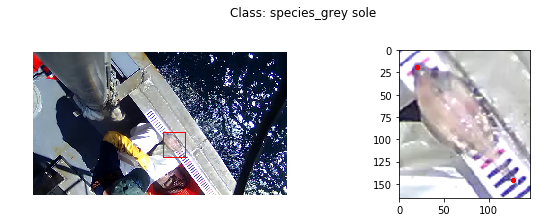

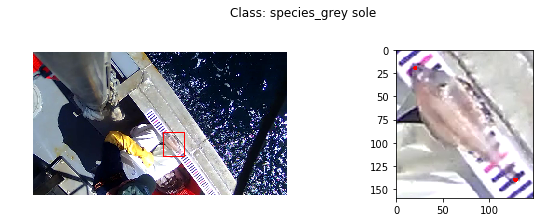

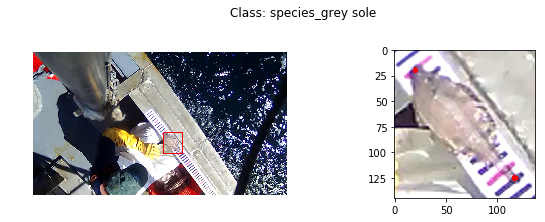

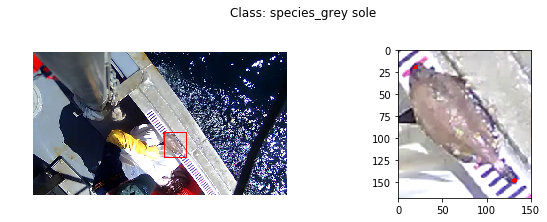

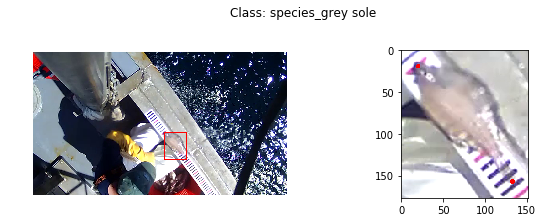

In [107]:
process_video(df, 0, 5)

Total Fish in Video: 49
skip sample at : 10


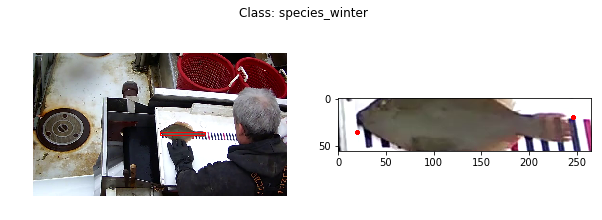

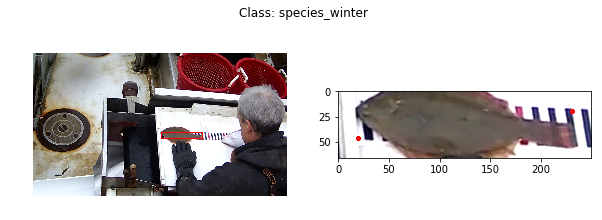

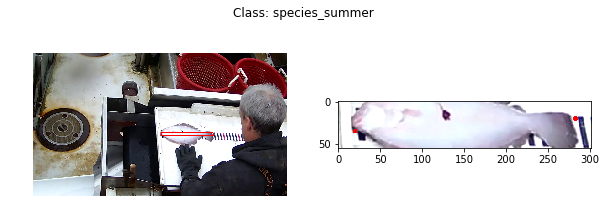

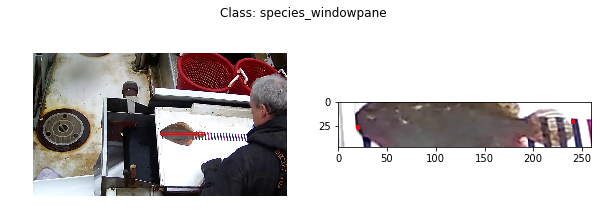

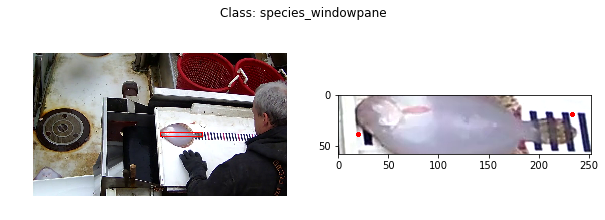

In [108]:
process_video(df, 111, 10)

Total Fish in Video: 56
skip sample at : 10


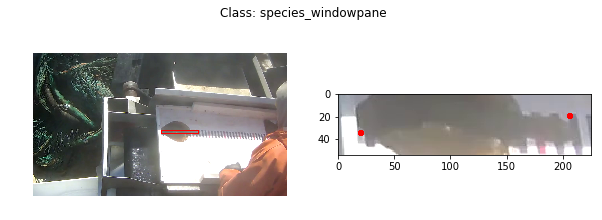

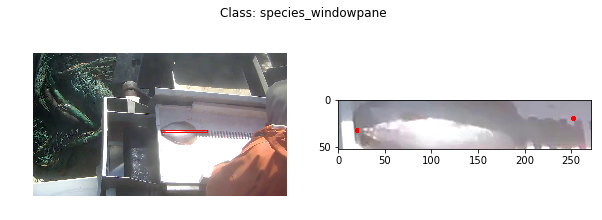

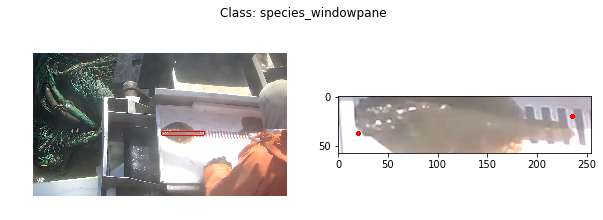

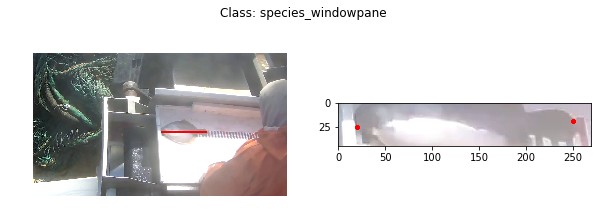

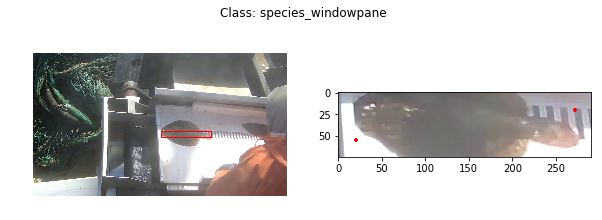

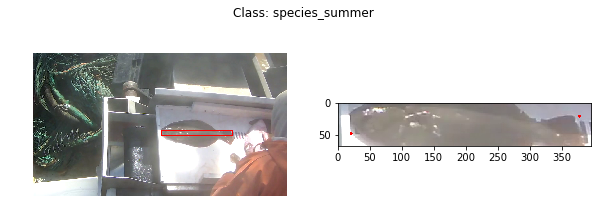

In [109]:
process_video(df, 11, 10)